# Multiclass Classification of MNIST Digits Dataset

The task is to perform multiclass classification (0- 9) on grayscale images from the **Modified National Institute of Standards Technology (MNIST)** dataset using **Feed Forwarding Neural Networks**.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('/home/spicysnoopy/train.csv')

The dataset, sourced from Kaggle, consists of 42,000 examples (represented as rows) of handwritten digits. Each example is a grayscale image of size 28 x 28 pixels. The 2D image data (28×28) is *flattened* into a *1D vector of 784 dimensions* to be fed into the neural network.

**Features:** Each image is represented as a single row with 785 columns (784 pixel values 1st to 785th, where 28×28=784).

**Labels:** The 0th column contains the actual digit the image represents (0-9).

In [ ]:
data.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.tail()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
19994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The dataset consists of 42K examples. The data are partitioned into first 1K for testing and rest 41K for training.

In [ ]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_test = data[0:1000].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255.0

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.0

Implementing feed forwarding network with a  simple two-layer architecture. Input layer $a^{[0]}$ will have 784 units corresponding to the 784 pixels in each 28x28 input image. A hidden layer $a^{[1]}$ will have 128 units with ReLU activation, and finally our output layer $a^{[2]}$ will have 10 units corresponding to the ten digit classes with softmax activation.

**Forward propagation**

$$Z^{[1]} = W^{[1]} X + b^{[1]}$$
$$A^{[1]} = g_{\text{ReLU}}(Z^{[1]}))$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$$
$$A^{[2]} = g_{\text{softmax}}(Z^{[2]})$$

**Backward propagation**

$$dZ^{[2]} = A^{[2]} - Y$$
$$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$$
$$dB^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}$$
$$dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]})$$
$$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$$
$$dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$$

**Parameter updates**

$$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$$
$$b^{[2]} := b^{[2]} - \alpha db^{[2]}$$
$$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$$
$$b^{[1]} := b^{[1]} - \alpha db^{[1]}$$

**Vars and shapes**

Forward prop

- $A^{[0]} = X$: 784 x m
- $Z^{[1]} \sim A^{[1]}$: 128 x m
- $W^{[1]}$: 128 x 784 (as $W^{[1]} A^{[0]} \sim Z^{[1]}$)
- $B^{[1]}$: 128 x 1
- $Z^{[2]} \sim A^{[2]}$: 10 x m
- $W^{[1]}$: 10 x 128 (as $W^{[2]} A^{[1]} \sim Z^{[2]}$)
- $B^{[2]}$: 10 x 1

Backprop

- $dZ^{[2]}$: 10 x m ($~A^{[2]}$)
- $dW^{[2]}$: 10 x 128
- $dB^{[2]}$: 10 x 1
- $dZ^{[1]}$: 128 x m ($~A^{[1]}$)
- $dW^{[1]}$: 128 x 784
- $dB^{[1]}$: 128 x 1

In [ ]:
def init_params():
    W1 = np.random.randn(128, 784) * np.sqrt(2. / 784)
    b1 = np.zeros((128, 1))
    W2 = np.random.randn(10, 128) * np.sqrt(2. / 128)
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return expZ / np.sum(expZ, axis=0, keepdims=True)

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return (Z > 0).astype(float)

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = X.shape[1]
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1. / m * dZ2.dot(A1.T)
    db2 = 1. / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1. / m * dZ1.dot(X.T)
    db1 = 1. / m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print("Accuracy :",get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[6 6 5 ... 7 5 5] [4 8 5 ... 2 9 0]
Accuracy : 0.07368808884678141
Iteration:  10
[6 1 8 ... 6 9 0] [4 8 5 ... 2 9 0]
Accuracy : 0.6908258329385757
Iteration:  20
[4 1 8 ... 2 9 0] [4 8 5 ... 2 9 0]
Accuracy : 0.7861992736459814
Iteration:  30
[4 8 5 ... 2 9 0] [4 8 5 ... 2 9 0]
Accuracy : 0.8209905784514975
Iteration:  40
[4 8 5 ... 2 9 0] [4 8 5 ... 2 9 0]
Accuracy : 0.8397810411074267
Iteration:  50
[4 8 5 ... 2 9 0] [4 8 5 ... 2 9 0]
Accuracy : 0.8530975314490237
Iteration:  60
[4 8 5 ... 4 9 0] [4 8 5 ... 2 9 0]
Accuracy : 0.8616242960155798
Iteration:  70
[4 8 5 ... 4 9 0] [4 8 5 ... 2 9 0]
Accuracy : 0.8699405231854308
Iteration:  80
[4 8 5 ... 4 9 0] [4 8 5 ... 2 9 0]
Accuracy : 0.875782935943997
Iteration:  90
[4 8 5 ... 4 9 0] [4 8 5 ... 2 9 0]
Accuracy : 0.8800463182272751
Iteration:  100
[4 8 5 ... 4 9 0] [4 8 5 ... 2 9 0]
Accuracy : 0.884467603558082
Iteration:  110
[4 8 5 ... 4 9 0] [4 8 5 ... 2 9 0]
Accuracy : 0.8880467393020686
Iteration:  120
[4 8 5 ... 4

**92% accuracy on training set.**

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            predictions = get_predictions(A2)
            print(f"Iteration: {i}, Accuracy: {get_accuracy(predictions, Y):.4f}")
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 500)

Iteration: 0, Accuracy: 0.0883
Iteration: 10, Accuracy: 0.6880
Iteration: 20, Accuracy: 0.7785
Iteration: 30, Accuracy: 0.8147
Iteration: 40, Accuracy: 0.8385
Iteration: 50, Accuracy: 0.8529
Iteration: 60, Accuracy: 0.8628
Iteration: 70, Accuracy: 0.8694
Iteration: 80, Accuracy: 0.8747
Iteration: 90, Accuracy: 0.8786
Iteration: 100, Accuracy: 0.8823
Iteration: 110, Accuracy: 0.8854
Iteration: 120, Accuracy: 0.8885
Iteration: 130, Accuracy: 0.8915
Iteration: 140, Accuracy: 0.8934
Iteration: 150, Accuracy: 0.8950
Iteration: 160, Accuracy: 0.8967
Iteration: 170, Accuracy: 0.8990
Iteration: 180, Accuracy: 0.9005
Iteration: 190, Accuracy: 0.9020
Iteration: 200, Accuracy: 0.9028
Iteration: 210, Accuracy: 0.9041
Iteration: 220, Accuracy: 0.9053
Iteration: 230, Accuracy: 0.9062
Iteration: 240, Accuracy: 0.9073
Iteration: 250, Accuracy: 0.9083
Iteration: 260, Accuracy: 0.9093
Iteration: 270, Accuracy: 0.9104
Iteration: 280, Accuracy: 0.9115
Iteration: 290, Accuracy: 0.9120
Iteration: 300, Accur

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    return get_predictions(A2)

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


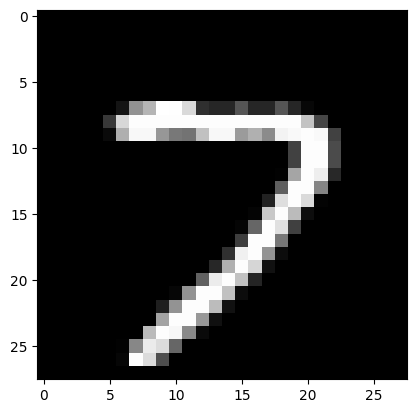

Prediction:  [8]
Label:  8


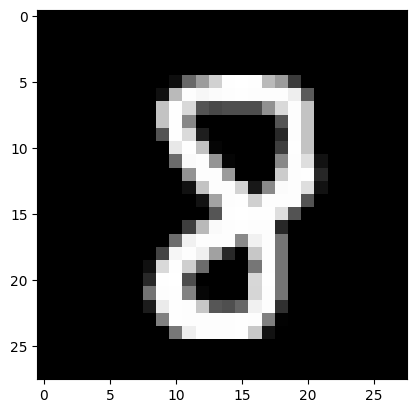

Prediction:  [8]
Label:  8


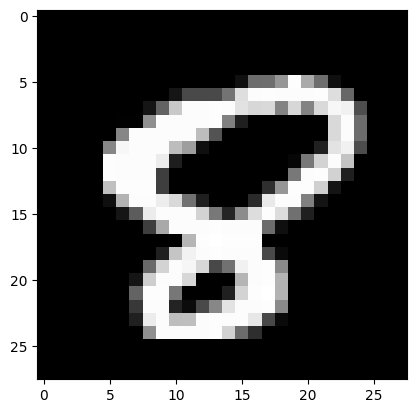

Prediction:  [4]
Label:  4


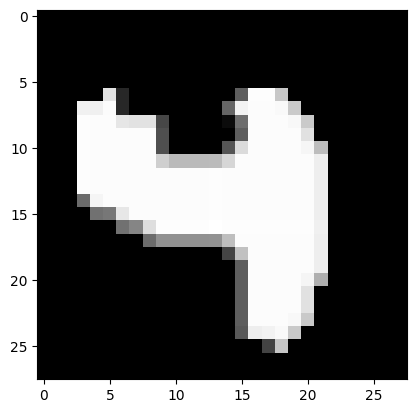

In [ ]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [ ]:
dev_predictions = make_predictions(X_test, W1, b1, W2, b2)
print("Accuracy:", get_accuracy(dev_predictions, Y_test))

Accuracy: 0.915
